# US School Analysis

## Start with imports and reading in your data

In [54]:
# Include all your imports here
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [55]:
# Load the Public school dataset
school_df_path = Path(r"C:\Users\dontb\01\001\Repos\Schools-Analysis\Resources\public_school_data.csv")
data = pd.read_csv(school_df_path)
data.head()

,UNIQUE_ID,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH
0,10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0
1,10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0
2,10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0
3,10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0
4,10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0


In [56]:
# Load the Public school locations dataset

school_locations_path = Path(r"C:\Users\dontb\01\001\Repos\Schools-Analysis\Resources\public_school_locations.csv")
locations = pd.read_csv(school_locations_path)
locations.head()

,ID,LATCOD,LONCOD
0,10000500870,34.2602,-86.206200
1,10000500871,34.2622,-86.204900
2,10000500879,34.2733,-86.220100
3,10000500889,34.2527,-86.221806
4,10000501616,34.2898,-86.193300


In [57]:
# Load the Public school data dictionary file
school_dict_path = Path(r"C:\Users\dontb\01\001\Repos\Schools-Analysis\Resources\school_data_dictionary.csv")
dictionary = pd.read_csv(school_dict_path)
dictionary.head()

,Fields,Field Descriptions
0,OBJECTID,OBJECTID
1,Shape,Shape
2,UNIQUE_ID,Unique School ID
3,SURVYEAR,Year corresponding to survey record
4,STABR,Postal state abbreviation code


## Data Exploration and Preparation

In [58]:
# Use an .isin() function to keep only fields that appear in the main public_school_data.csv and identify the unique id column 
dictionary = dictionary[dictionary["Fields"].isin(data.columns)]
dictionary.head()

,Fields,Field Descriptions
2,UNIQUE_ID,Unique School ID
12,LSTATE,Location state
21,SCHOOL_LEVEL,School level
25,SCHOOL_TYPE_TEXT,School type (description)
51,TOTAL,Total students all grades (includes AE)


In [59]:
# Ensure the column you selected is indeed a unique identifier by checking the number of uniqe values and comparing it to the number of rows in the dataframe
print(len(data.UNIQUE_ID))
print(len(data.index))



100722
100722


In [60]:
# Change the names of the unique ID column in both the location data and public school data to match and set them as index
locations.rename(columns={locations.columns[0]: "ID_NUM"}, inplace=True)
data.rename(columns={data.columns[0]: "ID_NUM"}, inplace=True)
locations.set_index("ID_NUM", inplace=True)
data.set_index("ID_NUM", inplace=True)

In [61]:
# Check your work

locations.head()

,LATCOD,LONCOD
ID_NUM,,
10000500870,34.2602,-86.206200
10000500871,34.2622,-86.204900
10000500879,34.2733,-86.220100
10000500889,34.2527,-86.221806
10000501616,34.2898,-86.193300


In [62]:
# Check your work

data.head()

,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH
ID_NUM,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0


In [63]:
# Join the location and data dataframes together

df = pd.concat([data, locations], axis=1, join="inner")
df.head()
# df.index.duplicated().sum()

,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH,LATCOD,LONCOD
ID_NUM,,,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0,34.2602,-86.206200
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0,34.2622,-86.204900
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0,34.2733,-86.220100
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0,34.2527,-86.221806
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0,34.2898,-86.193300


In [64]:
# Get the value counts for the school type column


df["SCHOOL_TYPE_TEXT"].value_counts()

Regular school                  91595
Alternative Education School     5588
Special education school         1946
Career and Technical School      1593
Name: SCHOOL_TYPE_TEXT, dtype: int64

In [65]:
# Create a subset of the dataframe that only includes regular schools ensure it was successful by comparing rows in the subset to the value counts above
regular_schools = df.loc[df['SCHOOL_TYPE_TEXT'] == 'Regular school']

print(len(regular_schools))

91595


In [66]:
print(len(regular_schools["TOTAL"]))

91595


## Data Cleaning and dealing with nulls

In [67]:
# Check for nulls and determine the best approach for dealing with them
regular_schools.isnull().sum()

LSTATE                  0
SCHOOL_LEVEL            0
SCHOOL_TYPE_TEXT        0
TOTAL                 868
FTE                  6653
STUTERATIO            532
AM                  22158
AS                  11894
BL                   7059
HP                  32405
HI                   2257
TR                   4972
WH                   2368
LATCOD                  0
LONCOD                  0
dtype: int64

In [68]:
# Fill some of the columns with 0 where it makes sense

regular_schools = regular_schools.loc[regular_schools["AM"] == regular_schools["AM"].fillna(0)]
regular_schools = regular_schools.loc[regular_schools["AS"] == regular_schools["AS"].fillna(0)]
regular_schools = regular_schools.loc[regular_schools["BL"] == regular_schools["BL"].fillna(0)]
regular_schools = regular_schools.loc[regular_schools["HP"] == regular_schools["HP"].fillna(0)]
regular_schools = regular_schools.loc[regular_schools["HI"] == regular_schools["HI"].fillna(0)]
regular_schools = regular_schools.loc[regular_schools["TR"] == regular_schools["TR"].fillna(0)]
regular_schools = regular_schools.loc[regular_schools["WH"] == regular_schools["WH"].fillna(0)]
# regular_schools["AM"] = regular_schools["AM"].fillna(0)
# regular_schools["AS"] = regular_schools["AS"].fillna(0)
# regular_schools["BL"] = regular_schools["BL"].fillna(0)
# regular_schools["HP"] = regular_schools["HP"].fillna(0)
# regular_schools["HI"] = regular_schools["HI"].fillna(0)
# regular_schools["TR"] = regular_schools["TR"].fillna(0)
# regular_schools["WH"] = regular_schools["WH"].fillna(0)

In [69]:
# Verify changes to nulls and prepare to drop na
regular_schools.isnull().sum()

LSTATE                 0
SCHOOL_LEVEL           0
SCHOOL_TYPE_TEXT       0
TOTAL                  0
FTE                 1967
STUTERATIO           474
AM                     0
AS                     0
BL                     0
HP                     0
HI                     0
TR                     0
WH                     0
LATCOD                 0
LONCOD                 0
dtype: int64

In [70]:
# Drop remaining nulls wher it would make sense

regular_schools = regular_schools.dropna().copy()


In [71]:
# Verify changes to nulls and no nulls should remain
regular_schools.isnull().sum()

LSTATE              0
SCHOOL_LEVEL        0
SCHOOL_TYPE_TEXT    0
TOTAL               0
FTE                 0
STUTERATIO          0
AM                  0
AS                  0
BL                  0
HP                  0
HI                  0
TR                  0
WH                  0
LATCOD              0
LONCOD              0
dtype: int64

In [72]:
# Round up decimals

regular_schools = regular_schools.round(2)
regular_schools.head()



,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH,LATCOD,LONCOD
ID_NUM,,,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0,34.26,-86.21
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0,34.26,-86.20
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0,34.27,-86.22
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0,34.25,-86.22
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0,34.29,-86.19


In [73]:
# Write out df as csv for reference

regular_schools.to_csv('regular_schools.csv', header=True, index_label="ID_NUM")

## Plotting to help Clean the Data

Text(0.5, 1.0, 'Distribution of Total Enrollment')

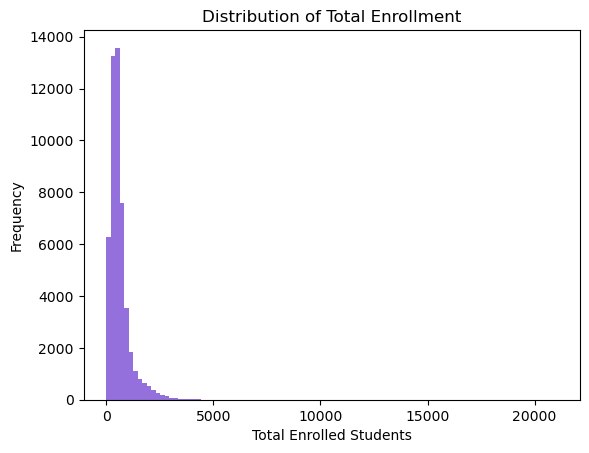

In [74]:
# Plot a histogram of Total enrolled students and check for outliers

regular_schools["TOTAL"].plot.hist(bins=100, facecolor="mediumpurple")
plt.xlabel("Total Enrolled Students")
plt.title("Distribution of Total Enrollment")

Text(0.5, 1.0, 'Distribution of Total Teachers')

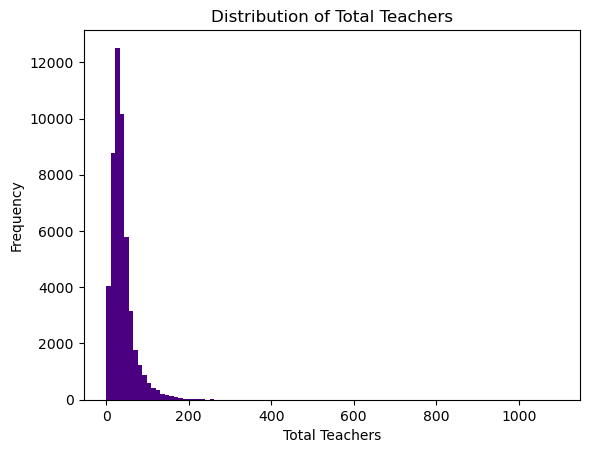

In [75]:
# Plot a histogram of Total Teachers and check for outliers

regular_schools["FTE"].plot.hist(bins=100, facecolor="indigo")
plt.xlabel("Total Teachers")
plt.title("Distribution of Total Teachers")

Text(0.5, 1.0, 'Distribution of Student/Teacher Ratio')

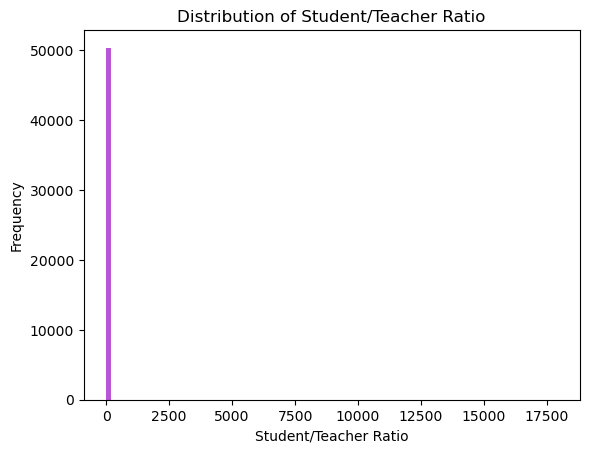

In [76]:
# Plot a histogram of Student Teacher Ratio and check for outliers
regular_schools["STUTERATIO"].plot.hist(bins=100, facecolor="mediumorchid")
plt.xlabel("Student/Teacher Ratio")
plt.title("Distribution of Student/Teacher Ratio")

<AxesSubplot:ylabel='Frequency'>

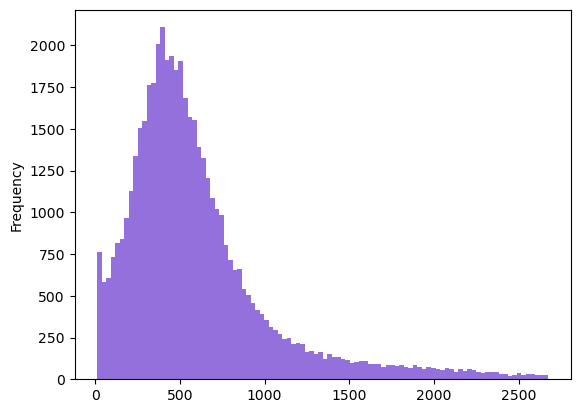

In [77]:
# Re-Plot a histogram of Total enrolled students after removing 0s and outliers above the 99th quantile

qlow_total = regular_schools["TOTAL"].quantile(0.01)
qhigh_total = regular_schools["TOTAL"].quantile(0.99)
total_filtered = regular_schools[(regular_schools["TOTAL"] >= qlow_total) & (regular_schools["TOTAL"] <= qhigh_total)]
total_filtered["TOTAL"].plot.hist(bins=100, facecolor="mediumpurple")

<AxesSubplot:ylabel='Frequency'>

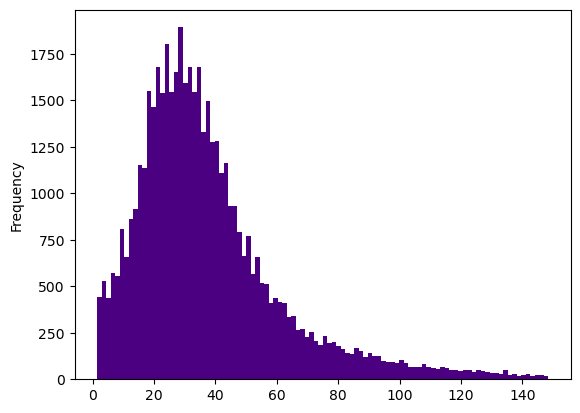

In [79]:
# Re-Plot a histogram of Total Teachers after removing 0s and outliers above the 99th quantile

qlow_fte = regular_schools["FTE"].quantile(0.01)
qhigh_fte = regular_schools["FTE"].quantile(0.99)
fte_filtered = regular_schools[(regular_schools["FTE"] >= qlow_fte) & (regular_schools["FTE"] <= qhigh_fte)]

fte_filtered["FTE"].plot.hist(bins=100, facecolor="indigo")

Text(0.5, 1.0, 'Distribution of Student/Teacher Ratio')

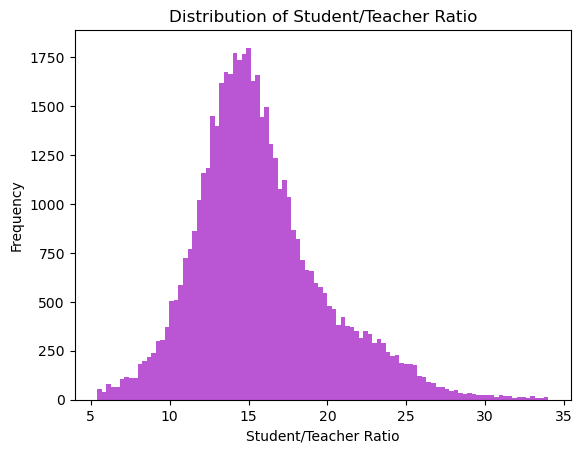

In [80]:
# Re-Plot a histogram of Student Teacher Ratio after removing 0s and outliers above the 99th quantile
qlow_stute = regular_schools["STUTERATIO"].quantile(0.01)
qhigh_stute = regular_schools["STUTERATIO"].quantile(0.99)
stuteratio_filtered = regular_schools[(regular_schools["STUTERATIO"] >= qlow_stute) & (regular_schools["STUTERATIO"] <= qhigh_stute)]

stuteratio_filtered["STUTERATIO"].plot.hist(bins=100, facecolor="mediumorchid")
plt.xlabel("Student/Teacher Ratio")
plt.title("Distribution of Student/Teacher Ratio")



## Correlation Plot to Understand Data Relationships

In [ ]:
regular_schools.head()

Text(0.5, 1.0, 'Correlation Heatmap')

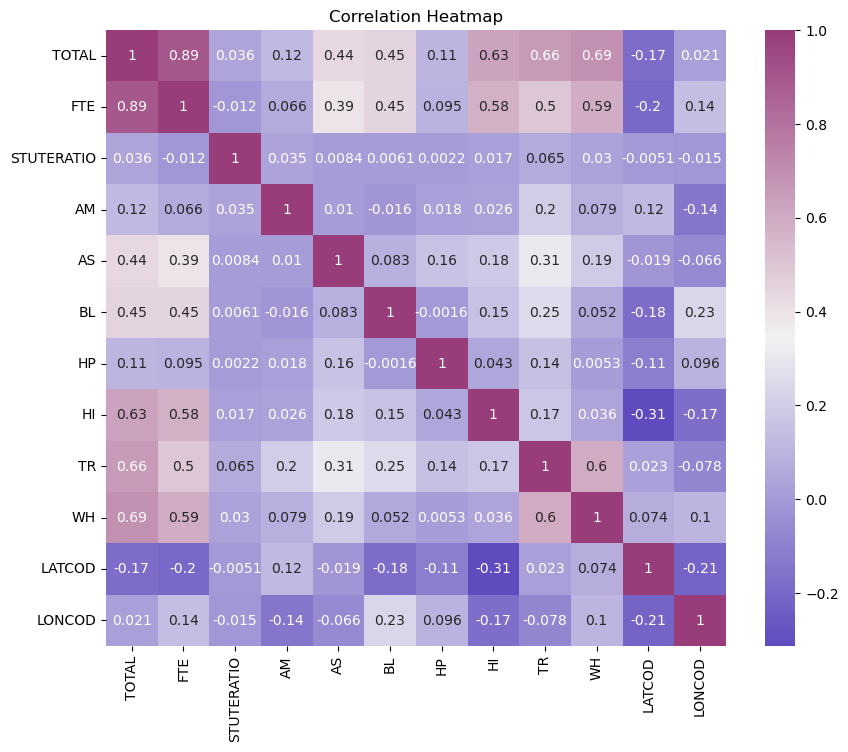

In [81]:
# Use seaborn to generate a correlation heatmap for the columns in the dataframe
corr_matrix = regular_schools.corr()

# Custom colored heatmap:
my_cmap = sns.diverging_palette(270, 330, s=65, l=40, as_cmap=True)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=my_cmap)
plt.title('Correlation Heatmap')


## Geographic Plots

In [95]:
# Display columns for reference

regular_schools.columns

Index(['LSTATE', 'SCHOOL_LEVEL', 'SCHOOL_TYPE_TEXT', 'TOTAL', 'FTE',
       'STUTERATIO', 'AM', 'AS', 'BL', 'HP', 'HI', 'TR', 'WH', 'LATCOD',
       'LONCOD'],
      dtype='object')

In [139]:
# Set necessary df parameters

contiguous = regular_schools.iloc[:, [0, 13, 14]].copy()

# Uncomment the following to check unique values:

# states = contiguous["LSTATE"].unique()
# for state in states:
    # print(state)

# "VI" and "GU" are the only two values in the df that are not contiguous states

territories = ["VI", "GU"]
contiguous = contiguous[contiguous.LSTATE.isin(territories) == False]

# Uncomment the following to check unique values:

# states = contiguous["LSTATE"].unique()
# for state in states:
    # print(state)
contiguous.set_index(contiguous["LSTATE"], inplace=True)
contiguous = contiguous.drop(columns=["LSTATE"])

contiguous.head()

,LATCOD,LONCOD
LSTATE,,
AL,34.26,-86.21
AL,34.26,-86.20
AL,34.27,-86.22
AL,34.25,-86.22
AL,34.29,-86.19


<AxesSubplot:xlabel='LONCOD', ylabel='LATCOD'>

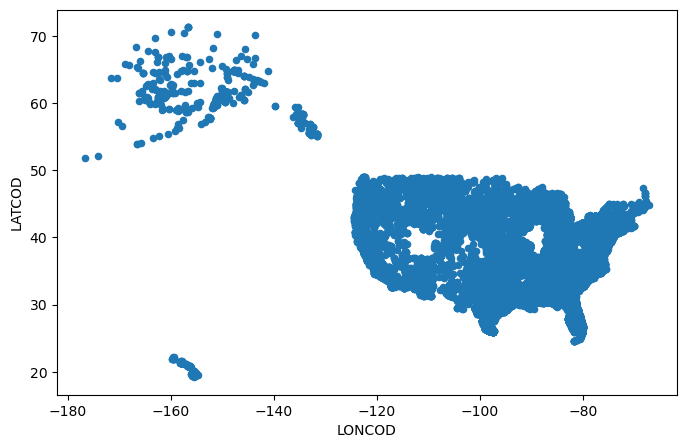

In [154]:
# Plot only schools from the 48 contiguous US states or the 50 US states (drop territories and PR)

contiguous.plot.scatter(x="LONCOD", y="LATCOD", figsize=(8,5))


In [ ]:
# Plot only schools in your state





## School Quality Analysis: Student/Teacher Ratios

In [ ]:
# Use the dataframe that has filtered out the outliers in Student Teacher Ratio and group by state and get the average
# Show the highest 5 Student/Teacher ratios and lowest 5 Student/Teacher ratios as well as the average for your state



In [ ]:
# What is the mean of the Student/Teacher Ratio


In [ ]:
# What is the standard deviation of the Student/Teacher Ratio


In [ ]:
# Plot the states ratios in descending order


In [ ]:
# Plot a boxplot of the Student/Teacher Ratios


In [ ]:
# List or Plot the Highest 5 states



In [ ]:
# List or plot the lowest 5



In [ ]:
# Print your state's Student Teacher Ratios



## Summarize your findings from any of the analysis or plots above:
* Were there any interesting Correlations?
* How did your state compare to others?
* Would you have made any different decisions in the earlier cleaning stages after becoming more familiar with the data?
* What is going on in IL?
* What other analysis could be done with this data?

## BONUS: Generate other interesting analysis or plots

In [ ]:
# Your code below
